In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The data is 32560 X 15. Apart from Age, Capital_gain, Capital_loss, Hours_per_week, all are categorical data - need to be encoded. Education is same as education_num and will be deleted.

In [48]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There is skewness in Fnlwgt, Capital_loss, Capital_gain. Will have to be inspected. Hours per week need to be checked

In [49]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There is no missing data. Going ahead with encoding.

In [51]:
df = df.drop('Education', axis = 1)

In [52]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
for i in df:
    if df[i].dtypes != 'int64':
        s1 = lenc.fit_transform(df[i])
        s1 = pd.DataFrame(s1)
        df[i] = s1
    else:
        continue
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education_num   32560 non-null  int64
 4   Marital_status  32560 non-null  int32
 5   Occupation      32560 non-null  int32
 6   Relationship    32560 non-null  int32
 7   Race            32560 non-null  int32
 8   Sex             32560 non-null  int32
 9   Capital_gain    32560 non-null  int64
 10  Capital_loss    32560 non-null  int64
 11  Hours_per_week  32560 non-null  int64
 12  Native_country  32560 non-null  int32
 13  Income          32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


<AxesSubplot:>

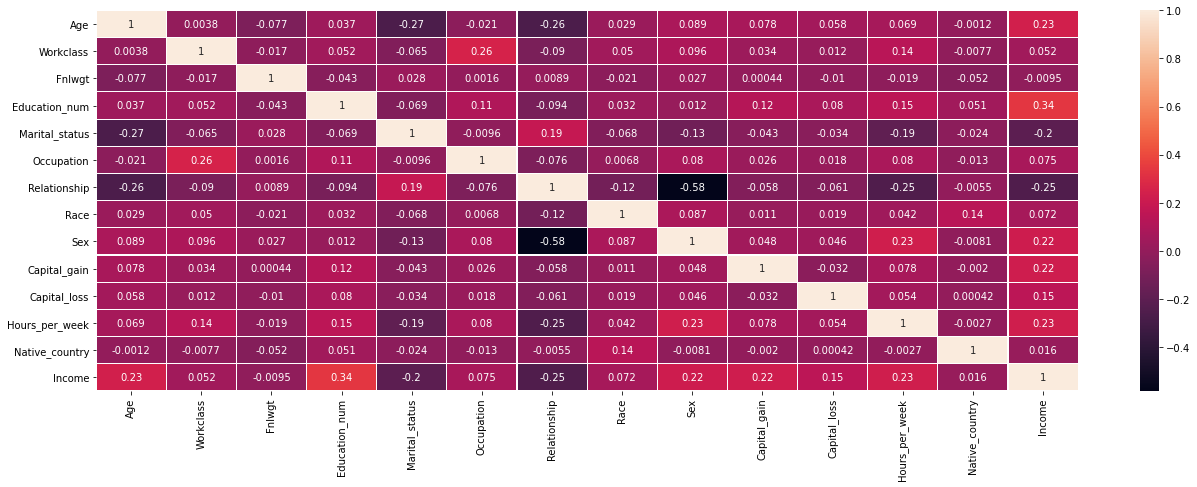

In [53]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.1)

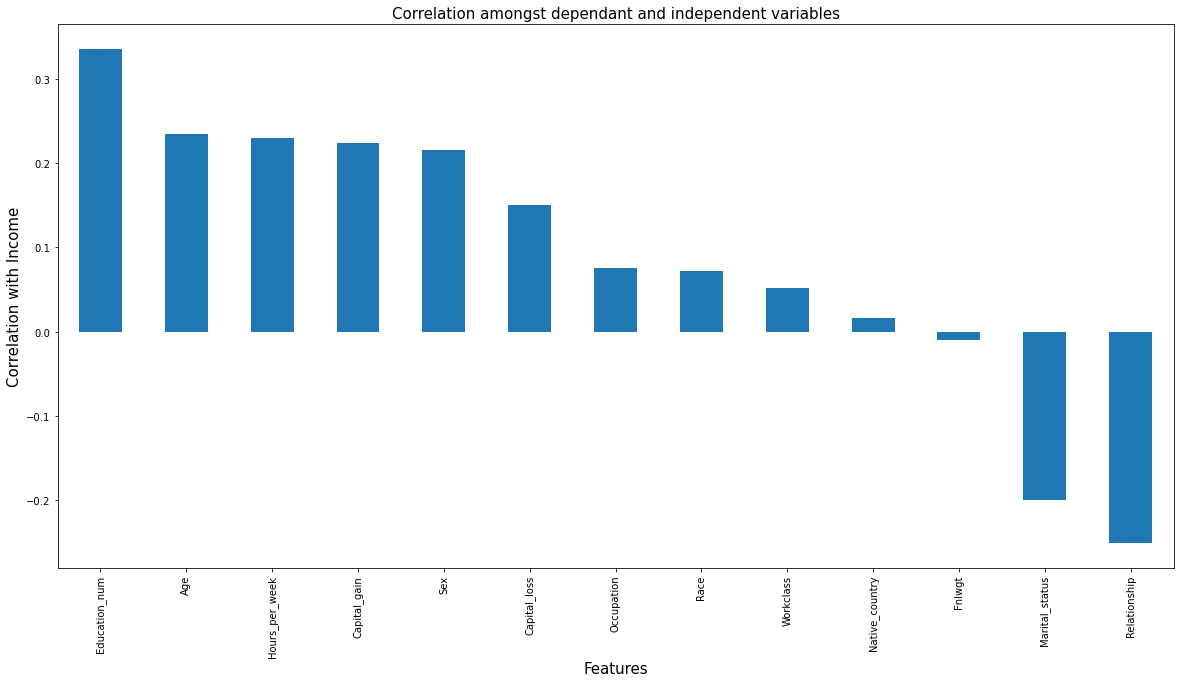

In [54]:
df2 = df.corr()
plt.figure(figsize=(20,10))
df2['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Correlation with Income', fontsize = 15)
plt.title('Correlation amongst dependant and independent variables', fontsize = 15)
plt.show()

There is very low correlation of Native_country and Fnlwgt with the target variable.

In [55]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

Data is imbalanced. We'll have to balance the data.

In [56]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

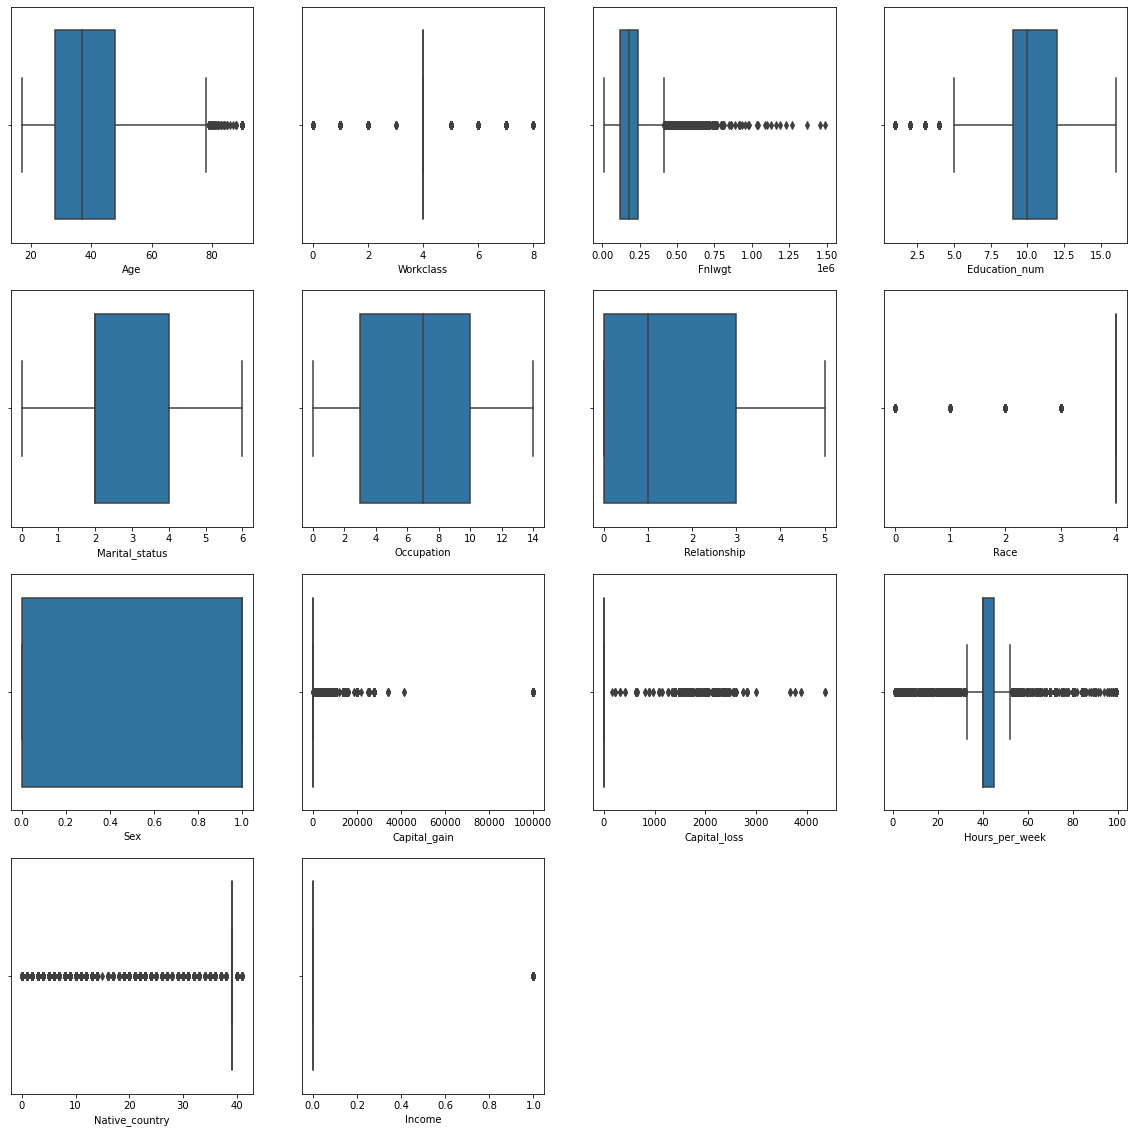

In [57]:
plt.figure(figsize=(20,20))
gr = 1
for c in df:
    ax = plt.subplot(4, 4, gr)
    sns.boxplot(df[c])
    plt.xlabel(c, fontsize = 10)
    gr+=1
plt.show()

There are outliers in age, capital gain, capital loss, Fnlwgt and hours per week.

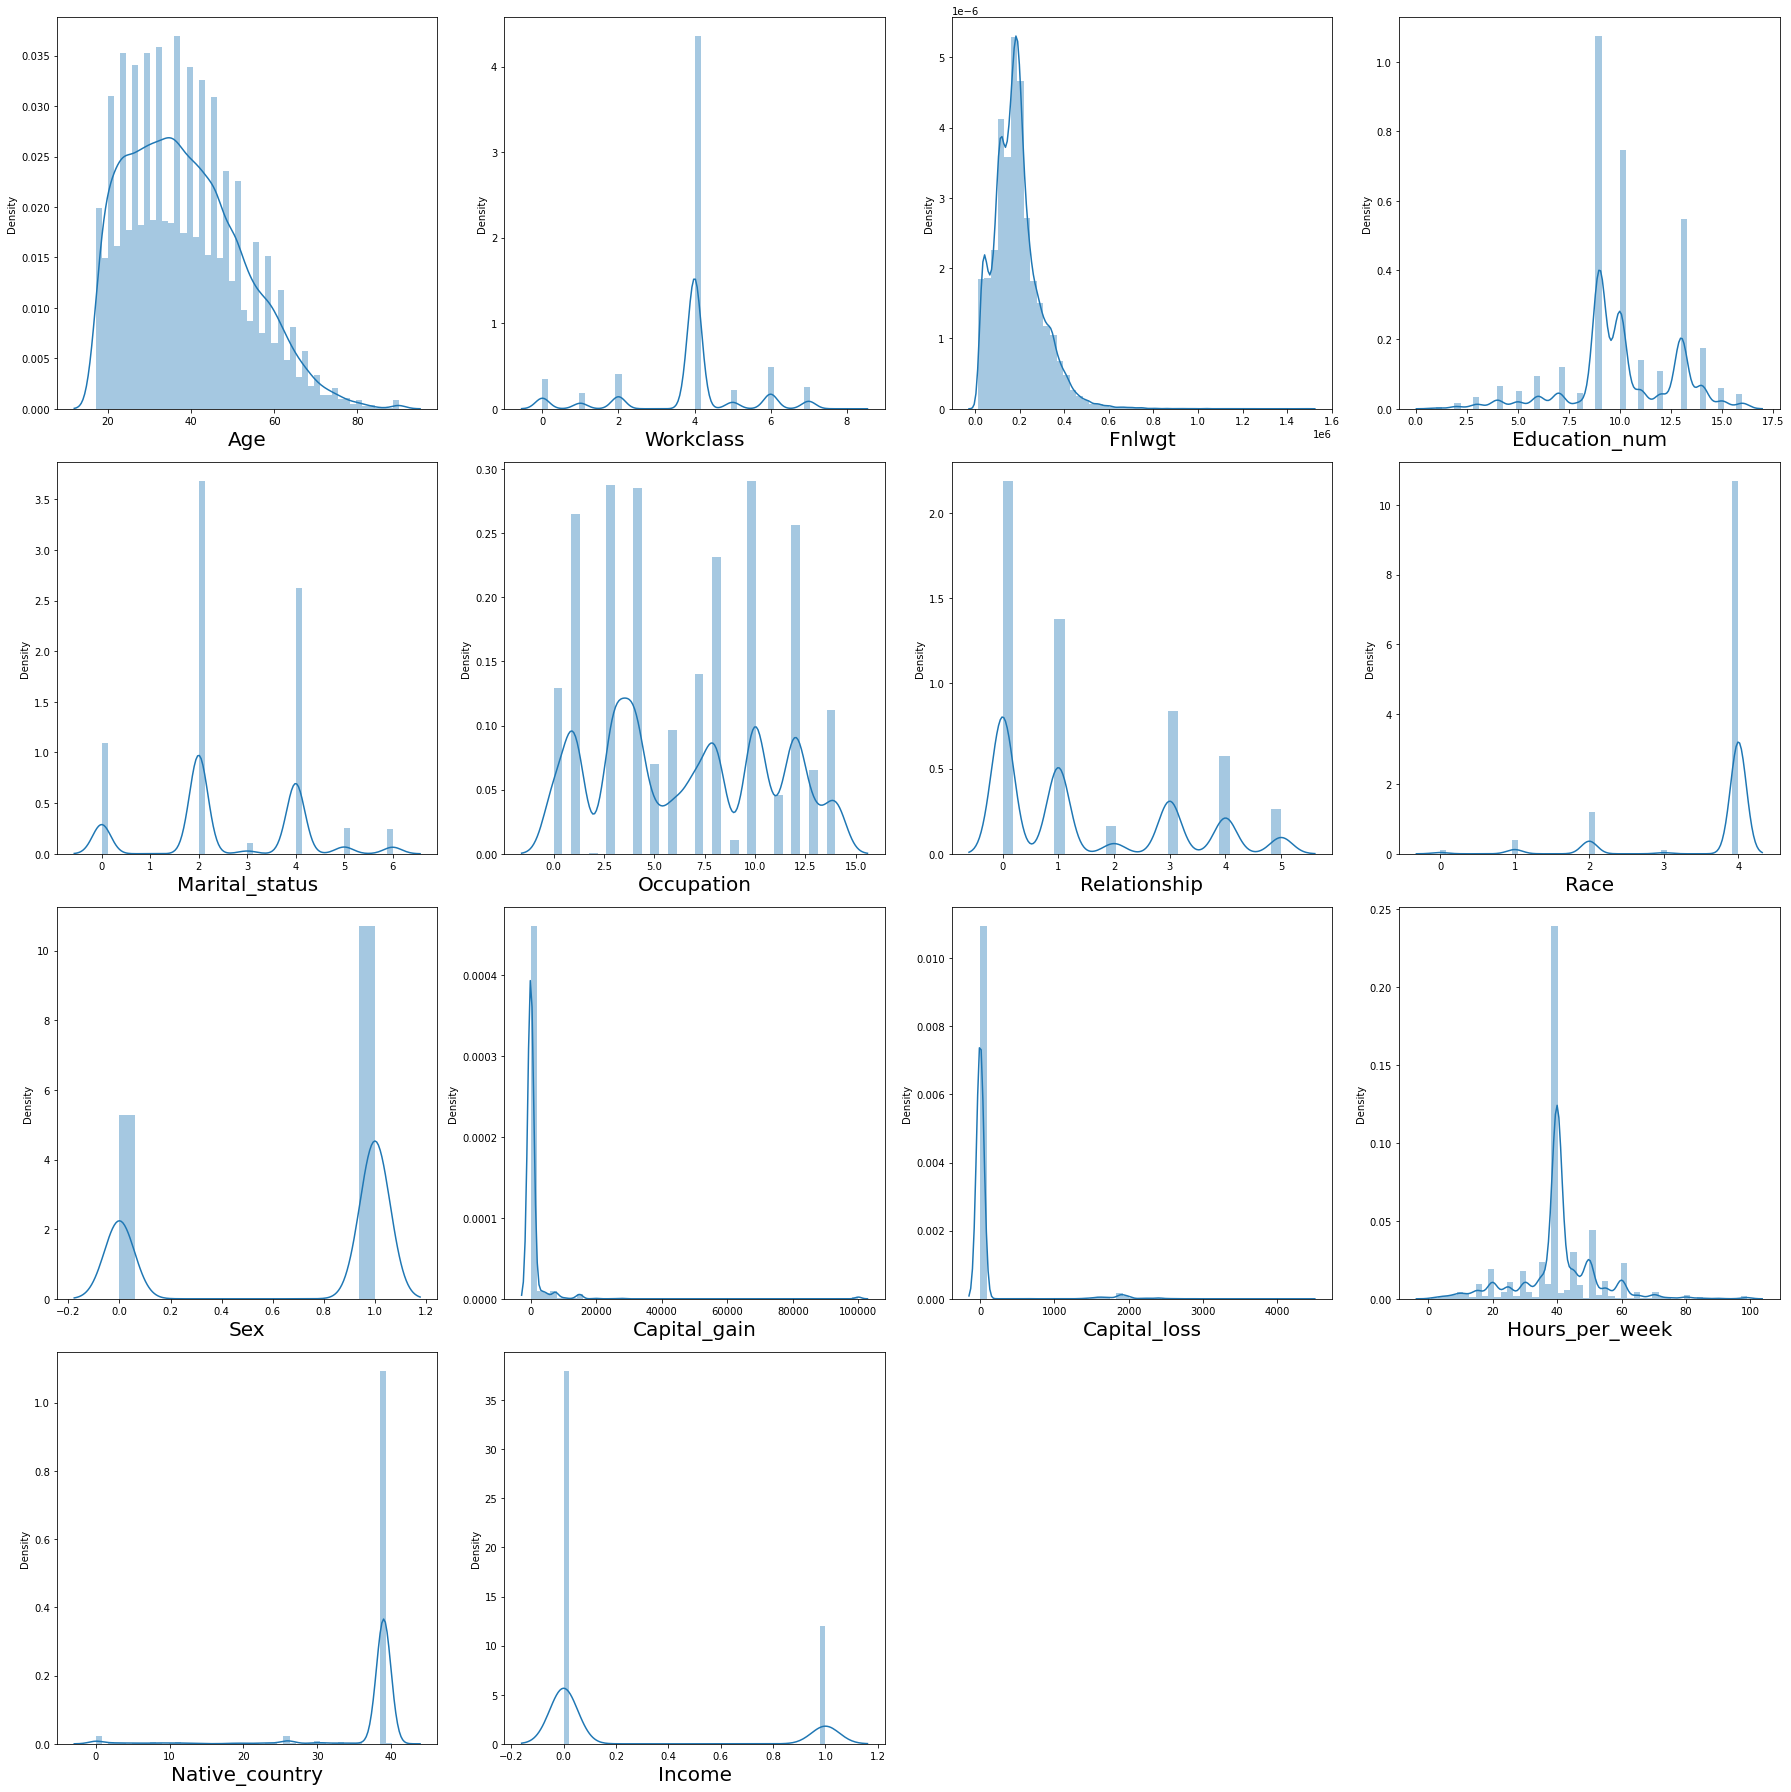

In [58]:
plt.figure(figsize=(25,25))
plotnumber = 1
for c in df:
    ax= plt.subplot(4,4,plotnumber)
    sns.distplot(df[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()

Removing outliers from capital gain, Fnlwgt, age, Hours per week and and capital loss.

In [101]:
from scipy.stats import zscore
z=np.abs(zscore(df[['Capital_gain', 'Capital_loss', 'Age', 'Hours_per_week', 'Fnlwgt']]))
dfn=df[(z<3).all(axis=1)]
dfn.shape

(30028, 14)

There is low data loss - <10%. Good to go. 

In [102]:
dfn['Income'].value_counts()

0    23369
1     6659
Name: Income, dtype: int64

In [103]:
dfn.skew()

Age                0.489206
Workclass         -0.747158
Fnlwgt             0.633615
Education_num     -0.324321
Marital_status    -0.047716
Occupation         0.119988
Relationship       0.745900
Race              -2.431921
Sex               -0.681754
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
Native_country    -3.660301
Income             1.339595
dtype: float64

Data is still imbalanced because of which there is skew in Capital_loss, Fnlwgt, Capital_gain. 
Fixing skew with yeo - johnson method

In [104]:
X = dfn.drop('Income', axis=1)
y = dfn['Income']
from sklearn.feature_selection import SelectKBest, f_classif
bf= SelectKBest(score_func = f_classif, k='all')
fit = bf.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature name', 'Score']
print(feature_scores.nlargest(31,'Score'))

      Feature name        Score
9     Capital_gain  3998.393801
3    Education_num  3355.382654
6     Relationship  1914.873125
0              Age  1780.183142
11  Hours_per_week  1685.093296
8              Sex  1370.117599
4   Marital_status  1182.275340
7             Race   156.289404
5       Occupation   146.181232
1        Workclass    54.284075
12  Native_country     8.773726
10    Capital_loss     8.135568
2           Fnlwgt     3.417775


There might be low K-Score of some variables because of imballanced data. We'll look to it if the model is overfitting.

In [105]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
dfn1 = power.fit_transform(dfn[['Capital_loss', 'Capital_gain', 'Fnlwgt']])
dfn1 = pd.DataFrame(dfn1)
dfn1.columns = dfn[['Capital_loss', 'Capital_gain', 'Fnlwgt']].columns
dfn.index = dfn1.index
dfn1.head()

,Capital_loss,Capital_gain,Fnlwgt
0,-0.040013,-0.296001,-1.116219
1,-0.040013,-0.296001,0.422177
2,-0.040013,-0.296001,0.601968
3,-0.040013,-0.296001,1.480733
4,-0.040013,-0.296001,1.042787


In [106]:
for i in dfn1:
    dfn[i] = dfn1[i]
dfn.skew()

Age                0.489206
Workclass         -0.747158
Fnlwgt            -0.034890
Education_num     -0.324321
Marital_status    -0.047716
Occupation         0.119988
Relationship       0.745900
Race              -2.431921
Sex               -0.681754
Capital_gain       3.082525
Capital_loss      24.952898
Hours_per_week    -0.350891
Native_country    -3.660301
Income             1.339595
dtype: float64

The skew cannot be removed. It is not suggested that we fidget with the data as capital gain and capital loss happen very rarely.

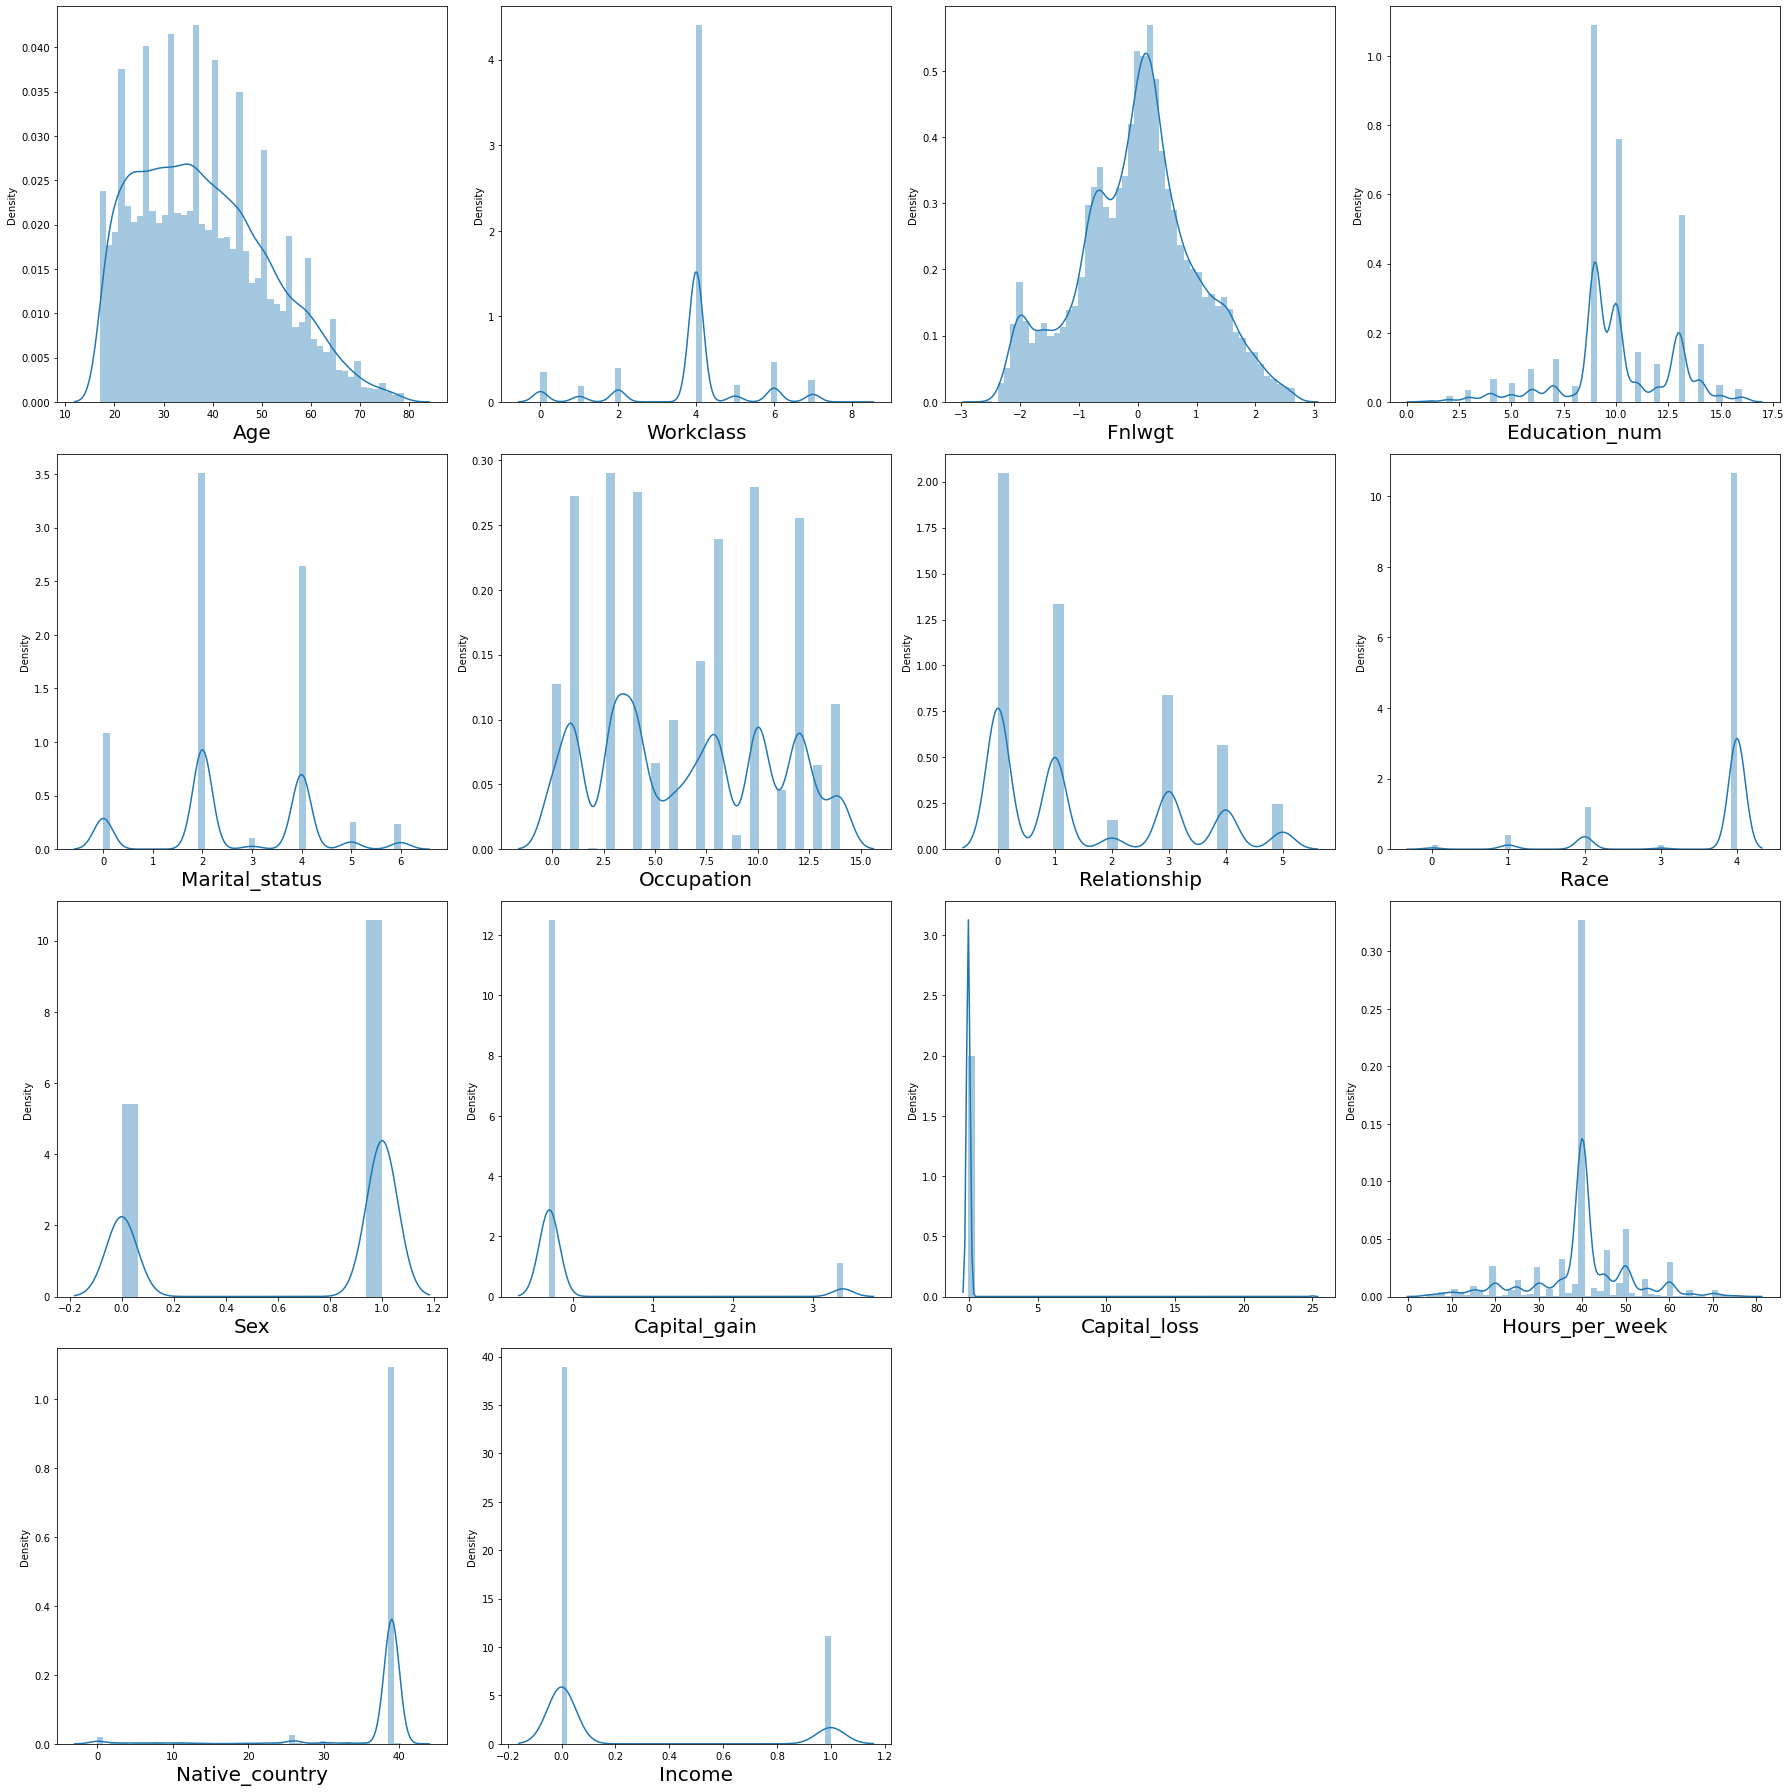

In [107]:
plt.figure(figsize=(25,25))
plotnumber = 1
for c in dfn:
    ax= plt.subplot(4,4,plotnumber)
    sns.distplot(dfn[c])  
    plt.xlabel(c,fontsize=20) 
    plotnumber+=1
plt.tight_layout()

In [108]:
q1  = dfn.quantile(0.25)
q3  = dfn.quantile(0.75)
iqr = q3 - q1
o_Capital_gain = (q3.Capital_gain + (1.5*iqr.Capital_gain))
o_Capital_loss = (q3.Capital_loss + (1.5*iqr.Capital_loss))
ind1 = np.where(dfn['Capital_gain']> o_Capital_gain)
ind2 = np.where(dfn['Capital_loss']> o_Capital_loss)

In [109]:
ind2

(array([  759,  2667,  3219,  3369,  4059,  4135,  4464,  5224,  6470,
         7607,  7769,  8979,  9438,  9541, 10088, 10174, 10384, 10535,
        10876, 12316, 13635, 14039, 14371, 14392, 14545, 15354, 15790,
        15946, 15949, 16040, 16224, 16772, 16907, 17294, 18119, 18684,
        18777, 19490, 24602, 25230, 25603, 26175, 26457, 26716, 27175,
        28584, 29418, 29971], dtype=int64),)

In [110]:
ind1

(array([    7,     8,    51, ..., 30005, 30015, 30027], dtype=int64),)

In [111]:
dfn.shape

(30028, 14)

In [112]:
dfn = dfn.drop(dfn.index[ind2])
dfn.shape
#Less than 10% data loss. No issues

(29980, 14)

In [113]:
dfn.skew()

Age               0.489282
Workclass        -0.748004
Fnlwgt           -0.035320
Education_num    -0.324524
Marital_status   -0.048023
Occupation        0.119934
Relationship      0.748726
Race             -2.432392
Sex              -0.684705
Capital_gain      3.079329
Capital_loss      0.000000
Hours_per_week   -0.350661
Native_country   -3.658835
Income            1.337586
dtype: float64

We can not do much more for the skew. Going ahead with the analysis.

In [115]:
dfn['Capital_loss'].value_counts()
#there is no valuable data in Capital loss. Deleting the column

-0.040013    29980
Name: Capital_loss, dtype: int64

In [116]:
dfn = dfn.drop('Capital_loss', axis = 1)

In [117]:
dfn['Income'].value_counts()

0    23323
1     6657
Name: Income, dtype: int64

We need to fix the imbalance

In [119]:
X = dfn.drop('Income', axis=1)
y = dfn['Income']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2, shuffle = True, stratify = y)

In [121]:
!pip install imblearn
!pip install delayed 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

In [122]:
dtc = DecisionTreeClassifier()
lreg = LogisticRegression()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()

In [124]:
dtc.fit(X_train_new, y_train_new)
lreg.fit(X_train_new, y_train_new)
rfc.fit(X_train_new, y_train_new)
knc.fit(X_train_new, y_train_new)
print(dtc.score(X_test,y_test), lreg.score(X_test,y_test), rfc.score(X_test,y_test), knc.score(X_test,y_test))

0.7954636424282855 0.7440960640426951 0.8334889926617746 0.7492995330220147


Random Forest is the most accurate. Performing CV on it

In [127]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc, X, y, cv=5).mean())
print(cross_val_score(rfc, X, y, cv=5).mean())
print(cross_val_score(knc, X, y, cv=5).mean())
print(cross_val_score(lreg, X, y, cv=5).mean())

0.8090060040026685
0.854736490993996
0.8147765176784523
0.8209472981987993


The difference between CV scores is least for dtc and rfc. Going ahead with rfc to perform cv

In [131]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [100, 200, 300, 400], 
         'criterion' : ['entropy', 'gini'],
         'max_depth' : [19, 21, 23, 25, 27, 29],
         'min_samples_split': [2, 5,10,15],
         'min_samples_leaf': [2, 5,10,15]}
grd = GridSearchCV(rfc, param_grid = params)
grd.fit(X_train_new, y_train_new)
print(grd.best_params_)

{'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [132]:
rf1 = grd.best_estimator_
rf1.fit(X_train_new, y_train_new)
print(rfc.score(X_test_,y_test))

0.8334889926617746


In [133]:
filename = 'census.pickle'
pickle.dump(rf1, open(filename, 'wb'))